# Data Cleaning and EDA 

In [52]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set(color_codes=True)
%matplotlib inline 

starwars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1") 
print(starwars.head(10))
print(starwars.columns)
print(starwars.shape)

   RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
0           NaN                                           Response             
1  3.292880e+09                                                Yes             
2  3.292880e+09                                                 No             
3  3.292765e+09                                                Yes             
4  3.292763e+09                                                Yes             
5  3.292731e+09                                                Yes             
6  3.292719e+09                                                Yes             
7  3.292685e+09                                                Yes             
8  3.292664e+09                                                Yes             
9  3.292654e+09                                                Yes             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                           

In [96]:
id = starwars["RespondentID"]
id_not_null = pd.notnull(id)
id_is_not_null = id[id_not_null]
starwars = starwars.loc[id_not_null] 
#If you want to remove the missing value on a dataframe based on certain Columns, apply 1) pd.notnull or pd.isnull and 
#2) put the value (i.e. True or False) back to the dataframe with loc.  

In [56]:
print(starwars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts()) 
print(starwars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts()) 
print(set(starwars["Have you seen any of the 6 films in the Star Wars franchise?"]))
print(set(starwars["Do you consider yourself to be a fan of the Star Wars film franchise?"]))

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
Yes    552
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64
set([u'Yes', u'No'])
set([nan, u'Yes', u'No'])


In [57]:
yes_no = {"Yes":True, "No":False} 
for col in ["Have you seen any of the 6 films in the Star Wars franchise?",
            "Do you consider yourself to be a fan of the Star Wars film franchise?"]: 
    starwars[col] = starwars[col].map(yes_no) 
    #If you chance the column into different values, you have to assign that column back to the original column, 
    #Not the entire dataset  


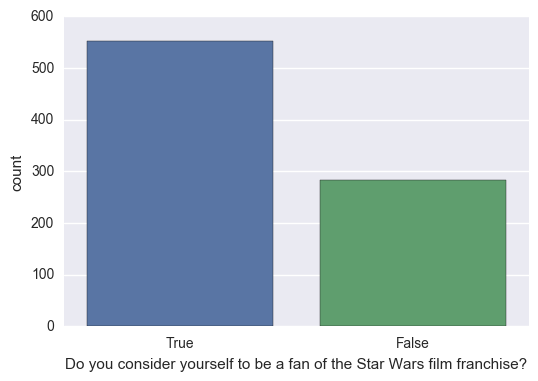

In [58]:
sns.countplot(x=starwars["Do you consider yourself to be a fan of the Star Wars film franchise?"])

In [60]:
titles = {'Star Wars: Episode I  The Phantom Menace':True, 
         np.nan:False,
         'Star Wars: Episode II  Attack of the Clones':True,
         'Star Wars: Episode III  Revenge of the Sith':True,
         'Star Wars: Episode IV  A New Hope':True, 
         'Star Wars: Episode V The Empire Strikes Back':True, 
         'Star Wars: Episode VI Return of the Jedi':True  
         }
for col in starwars.columns[3:9]:
    starwars[col] = starwars[col].map(titles)

In [61]:
starwars = starwars.rename(columns={"Which of the following Star Wars films have you seen? Please select all that apply.":"seen1"})
#inside the rename, the parameter has to be columns, not col or cols 
starwars = starwars.rename(columns={'Unnamed: 4':"seen2"})
starwars = starwars.rename(columns={'Unnamed: 5':"seen3"})
starwars = starwars.rename(columns={'Unnamed: 6':"seen4"})
starwars = starwars.rename(columns={'Unnamed: 7':"seen5"})
starwars = starwars.rename(columns={'Unnamed: 8':"seen6"})
starwars[starwars.columns[9:15]] = starwars[starwars.columns[9:15]].astype(float)
starwars[starwars.columns[9:15]].head()  
starwars = starwars.rename(columns={"Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.":"ranking_1"})
starwars = starwars.rename(columns={"Unnamed: 10":"ranking_2"})
starwars = starwars.rename(columns={"Unnamed: 11":"ranking_3"})
starwars = starwars.rename(columns={"Unnamed: 12":"ranking_4"})
starwars = starwars.rename(columns={"Unnamed: 13":"ranking_5"})
starwars = starwars.rename(columns={"Unnamed: 14":"ranking_6"})

In [66]:
starwars_mean = []
for col in starwars.columns[9:15]: 
    starwars_mean.append(starwars[col].mean())
print(starwars_mean)
#You don't need to assign the appended value back to starwars_mean

[3.7329341317365268, 4.087320574162679, 4.341317365269461, 3.272727272727273, 2.513157894736842, 3.047846889952153]


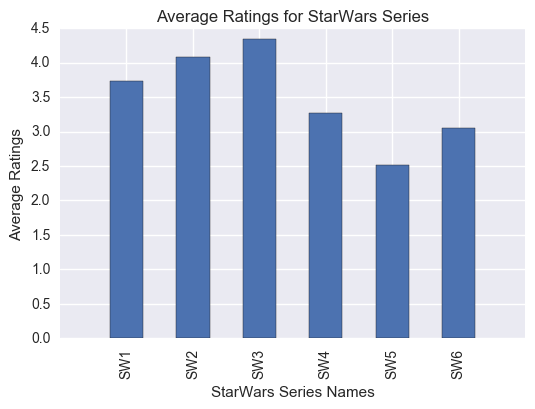

In [67]:
from numpy import arange 
fig, ax = plt.subplots() 
bar_positions = arange(6) + 0.75 
name_cols = ["SW1","SW2","SW3","SW4","SW5","SW6"]
tick_positions = range(1,7)

ax.bar(bar_positions, starwars_mean, 0.5)
ax.set_xticks(tick_positions)
ax.set_xticklabels(name_cols, rotation=90)
ax.set_xlabel("StarWars Series Names")
ax.set_ylabel("Average Ratings")
ax.set_title("Average Ratings for StarWars Series")
plt.show()


StarWars: Return of the Jedi has the highest rating (4.34). StarWars: EpisodeII Attack of the Clones has the lowest rating(2.51). 

[673, 571, 550, 607, 758, 738]


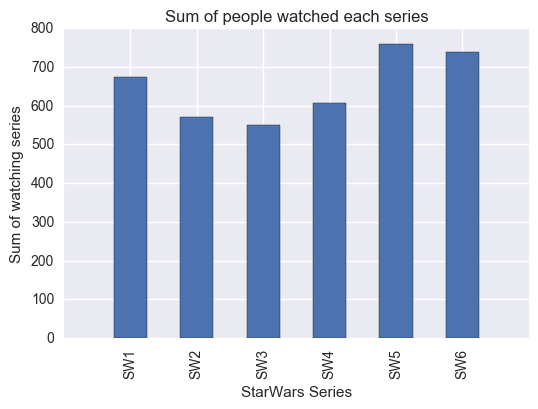

In [68]:
starwars_seen = [] 
for col in starwars.columns[3:9]: 
    starwars_seen.append(starwars[col].sum()) 
print(starwars_seen)

fig, ax = plt.subplots()
bar_positions = arange(6) + 0.75
name_columns = ["SW1","SW2","SW3","SW4","SW5","SW6"]
tick_positions = range(1,7)

ax.bar(bar_positions, starwars_seen, 0.5)
ax.set_xticks(tick_positions)
ax.set_xticklabels(name_columns,rotation=90)
ax.set_xlabel("StarWars Series")
ax.set_ylabel("Sum of watching series")
ax.set_title("Sum of people watched each series")


StarWars: EpisodeII Attack of the Clones is the most watched title(total 758). StarWars: Return of the Jedi is the least watched title(550). Interestingly, the most watched title has the least average rating although the least watched title has the highest average rating. 

In [69]:
starwars_favorably = {"Very favorably":6,
                     "Somewhat favorably":5,
                     "Neither favorably nor unfavorably (neutral)":4,
                     "Unfamiliar (N/A)":3,
                     "Somewhat unfavorably":2,
                     "Very unfavorably":1}
for col in starwars.columns[15:29]: 
    starwars[col] = starwars[col].map(starwars_favorably).astype(float)
starwars = starwars.rename(columns={"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.":"Han Solo"}) 
starwars = starwars.rename(columns={"Unnamed: 16":"Luke Skywalker"}) 
starwars = starwars.rename(columns={"Unnamed: 17":"Princess Leia Organa"})
starwars = starwars.rename(columns={"Unnamed: 18":"Anakin Skywalker"})
starwars = starwars.rename(columns={"Unnamed: 19":"Obi Wan Kenobi"})
starwars = starwars.rename(columns={"Unnamed: 20":"Emperor Palpatine"})
starwars = starwars.rename(columns={"Unnamed: 21":"Darth Vader"})
starwars = starwars.rename(columns={"Unnamed: 22":"Lando Calrissian"})
starwars = starwars.rename(columns={"Unnamed: 23":"Boba Fett"})
starwars = starwars.rename(columns={"Unnamed: 24":"C-3P0"})
starwars = starwars.rename(columns={"Unnamed: 25":"R2 D2"})
starwars = starwars.rename(columns={"Unnamed: 26":"Jar Jar Binks"})
starwars = starwars.rename(columns={"Unnamed: 27":"Padme Amidala"})
starwars = starwars.rename(columns={"Unnamed: 28":"Yoda"})

In [97]:
print(starwars.describe()) #Numerican values 
starwars.describe(include=['O']) #Categorical values 

       RespondentID   ranking_1   ranking_2   ranking_3   ranking_4  \
count  1.186000e+03  835.000000  836.000000  835.000000  836.000000   
mean   3.290128e+09    3.732934    4.087321    4.341317    3.272727   
std    1.055639e+06    1.656122    1.365365    1.400464    1.825901   
min    3.288373e+09    1.000000    1.000000    1.000000    1.000000   
25%    3.289451e+09         NaN         NaN         NaN         NaN   
50%    3.290147e+09         NaN         NaN         NaN         NaN   
75%    3.290814e+09         NaN         NaN         NaN         NaN   
max    3.292880e+09    6.000000    6.000000    6.000000    6.000000   

        ranking_5   ranking_6    Han Solo  Luke Skywalker  \
count  836.000000  836.000000  829.000000      831.000000   
mean     2.513158    3.047847    5.612786        5.542720   
std      1.578620    1.666897    0.769830        0.802281   
min      1.000000    1.000000    1.000000        1.000000   
25%           NaN         NaN         NaN             N

,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?Ý_Ý_,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
count,828,828,213,1068,1046,1046,858,1036,1043
unique,3,2,2,2,2,4,5,5,9
top,Han,No,No,False,Female,45-60,"$50,000 - $99,999",Some college or Associate degree,East North Central
freq,325,615,114,641,549,291,298,328,181


It seems like Jar Jar Binks is the least popular character among the listed Star Wars characters. 

In [72]:
starwars["Location (Census Region)"].value_counts(normalize=True)

East North Central    0.173538
Pacific               0.167785
South Atlantic        0.162991
Middle Atlantic       0.116970
West South Central    0.105465
West North Central    0.089166
Mountain              0.075743
New England           0.071908
East South Central    0.036433
Name: Location (Census Region), dtype: float64

In [73]:
starwars[["Have you seen any of the 6 films in the Star Wars franchise?","Location (Census Region)"]].groupby("Location (Census Region)").mean()

,Have you seen any of the 6 films in the Star Wars franchise?
Location (Census Region),
East North Central,0.740331
East South Central,0.842105
Middle Atlantic,0.762295
Mountain,0.860759
New England,0.800000
Pacific,0.834286
South Atlantic,0.782353
West North Central,0.817204
West South Central,0.690909


In [74]:
starwars["Do you consider yourself to be a fan of the Star Wars film franchise?"] = starwars["Do you consider yourself to be a fan of the Star Wars film franchise?"].astype(bool)

# Gender

Let's analyze the StarWars data based on gender binary category. 

In [79]:
starwars["Gender"].value_counts() 
#More female than men 

Female    549
Male      497
Name: Gender, dtype: int64

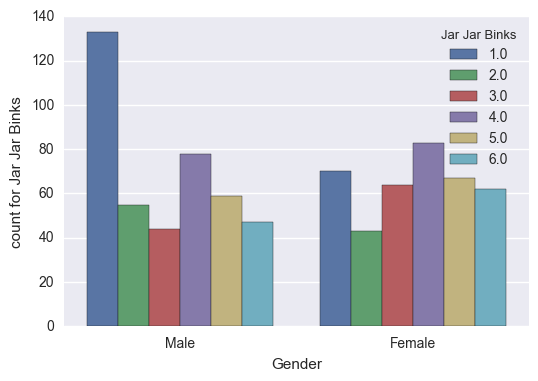

In [80]:
sns.countplot(x='Gender', hue="Jar Jar Binks", data=starwars)
plt.ylabel("count for Jar Jar Binks")
plt.show()

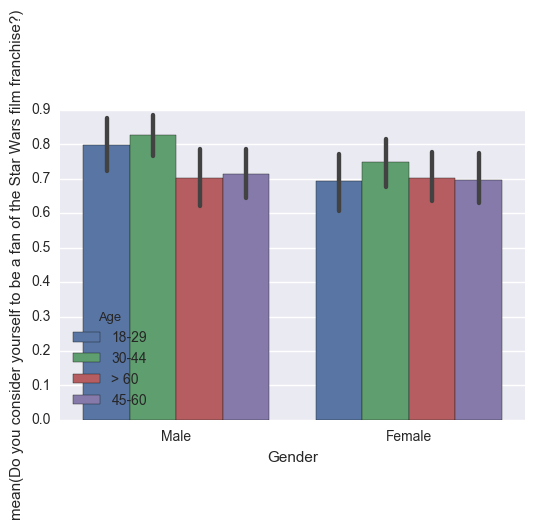

In [81]:
sns.barplot(x="Gender",y="Do you consider yourself to be a fan of the Star Wars film franchise?", hue="Age", data=starwars)
#Male are more likely to be a fan of StarWars compared to female

In [82]:
starwars["Do you consider yourself to be a fan of the Star Wars film franchise?"].mean()

0.760539629005059

# StarTrek fan 

In [83]:
starwars["Do you consider yourself to be a fan of the Star Trek franchise?"].value_counts(normalize=True) 
#More people are not a fan of Star Trek (60%)  

No     0.600187
Yes    0.399813
Name: Do you consider yourself to be a fan of the Star Trek franchise?, dtype: float64

In [84]:
starwars["Do you consider yourself to be a fan of the Star Trek franchise?"] = starwars["Do you consider yourself to be a fan of the Star Trek franchise?"].map({"Yes":True, "No":False})

In [85]:
starwars["Do you consider yourself to be a fan of the Star Trek franchise?"].value_counts()

False    641
True     427
Name: Do you consider yourself to be a fan of the Star Trek franchise?, dtype: int64

In [86]:
startrek_true = starwars[starwars["Do you consider yourself to be a fan of the Star Trek franchise?"] == True] 
startrek_false = starwars[starwars["Do you consider yourself to be a fan of the Star Trek franchise?"] == False] 

In [87]:
startrek_true_seen = [] 
for col in startrek_true.columns[3:9]:
    startrek_true_seen.append(startrek_true[col].sum())
print("StarTrek fan", startrek_true_seen)

startrek_false_seen = [] 
for col in startrek_false.columns[3:9]: 
    startrek_false_seen.append(startrek_false[col].sum())
print("Non-StarTrek fan", startrek_false_seen)
#How to visualize this results? 

('StarTrek fan', [364, 336, 322, 342, 397, 396])
('Non-StarTrek fan', [301, 228, 221, 258, 353, 334])


# Region 

Census Regions 
---------------------------------------------------------------
1: East North Central: Indiana, Illinoi, Michigan, Ohio, Wisconsin 
2: Pacific: Alaska, Washington, California, Oregon, Hawaii            
3: South Atlantic: Delaware, District of Columbia, Florida, Georgia, Maryland, North Carolina, South Carolina,Virginia 
4: West Virginia          
5: Middle Atlantic: New Jersy, New York, Pennsilvania         
6: West South Central: Arkansas, Louisiana, Oklahoma, Texas  
7: West North Central: Iowa, Nebraska, Kansas, NorthDakota, Minnesota, South Dakota, Missouri  
8: Mountain: Arizona, Colorado, Idaho, New Mexico          
9: New England: Mass, Main, Vermont, New Hampsher, Rhoad Island, Conneticat             
10: East South Central: Alabama, Kentucky, Mississippi, Tennessee

In [89]:
location_null = pd.isnull(starwars["Location (Census Region)"])
location_good = starwars["Location (Census Region)"][location_null == False] 
print(location_good)

1           South Atlantic
2       West South Central
3       West North Central
4       West North Central
5       West North Central
6          Middle Atlantic
7       East North Central
8           South Atlantic
9           South Atlantic
10                 Pacific
13          South Atlantic
14                Mountain
15      East North Central
16      West South Central
17             New England
18         Middle Atlantic
19          South Atlantic
20      West North Central
21                 Pacific
22                 Pacific
23          South Atlantic
24                 Pacific
25      East North Central
26      East South Central
27          South Atlantic
28         Middle Atlantic
29         Middle Atlantic
30      East North Central
31             New England
32      West North Central
               ...        
1156        South Atlantic
1157       Middle Atlantic
1158       Middle Atlantic
1159               Pacific
1160    West South Central
1161               Pacific
1

In [90]:
starwars["Location (Census Region)"].value_counts() 

East North Central    181
Pacific               175
South Atlantic        170
Middle Atlantic       122
West South Central    110
West North Central     93
Mountain               79
New England            75
East South Central     38
Name: Location (Census Region), dtype: int64

In [91]:
starwars[["Do you consider yourself to be a fan of the Star Wars film franchise?","Location (Census Region)"]].groupby("Location (Census Region)").mean().sort_values("Do you consider yourself to be a fan of the Star Wars film franchise?", ascending=0)
#West South Central(Arkansas, Louisiana, Oklahoma, Texas) has the highest average of being a Star Wars fan 
#Pacific region(Alaska, Washington, California, Oregon, Hawaii) is the lowest 

,Do you consider yourself to be a fan of the Star Wars film franchise?
Location (Census Region),
West South Central,0.790909
New England,0.786667
Middle Atlantic,0.762295
Mountain,0.759494
West North Central,0.752688
South Atlantic,0.735294
East North Central,0.723757
East South Central,0.684211
Pacific,0.657143


# Age

What's the most popular starwars character? 

In [92]:
starwars["Age"].value_counts(normalize=True)

45-60    0.278203
> 60     0.257170
30-44    0.256214
18-29    0.208413
Name: Age, dtype: float64

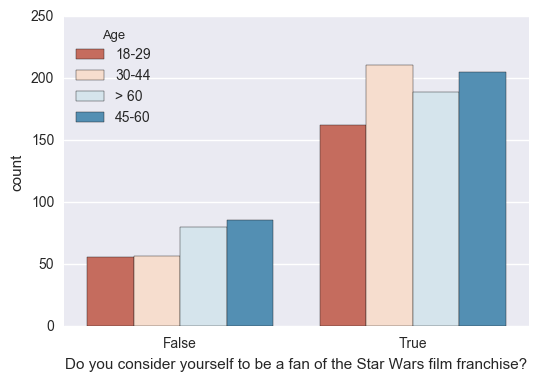

In [93]:
sns.countplot(x="Do you consider yourself to be a fan of the Star Wars film franchise?", hue="Age", data=starwars, palette="RdBu")

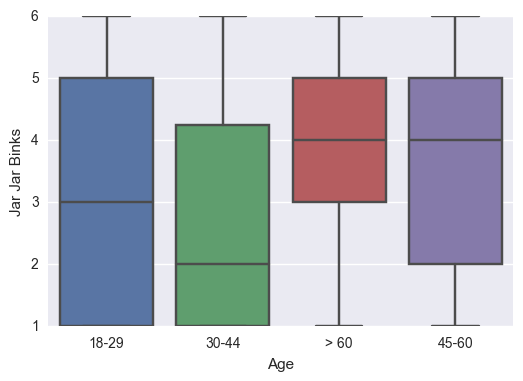

In [98]:
sns.boxplot(x="Age", y="Jar Jar Binks", data=starwars)

In [103]:
sns.countplot(x="Age", hue="Jar Jar Binks", order =[18-29, 30-44, 45-60, 60], data=starwars)

SyntaxError: invalid syntax (<ipython-input-103-9a4004497ff3>, line 1)

In [ ]:
sns.Faced